# PROJECT-4. Задача классификации

В данном проекте нам предстоит решить настоящую задачу, которая часто встаёт перед аналитиками, работающими в банковском секторе.

Банки хранят огромные объёмы информации о своих клиентах. Эти данные можно использовать для того, чтобы оставаться на связи с клиентами и индивидуально ориентировать их на подходящие именно им продукты или банковские предложения.

Обычно с выбранными клиентами связываются напрямую через разные каналы связи: лично (например, при визите в банк), по телефону, по электронной почте, в мессенджерах и так далее. Этот вид маркетинга называется прямым маркетингом. На самом деле, прямой маркетинг используется для взаимодействия с клиентами в большинстве банков и страховых компаний. Но, разумеется, проведение маркетинговых кампаний и взаимодействие с клиентами — это трудозатратно и дорого.

Банкам хотелось бы уметь выбирать среди своих клиентов именно тех, которые с наибольшей вероятностью воспользуются тем или иным предложением, и связываться именно с ними.

Нам предоставили данные о последней маркетинговой кампании, которую проводил банк: задачей было привлечь клиентов для открытия депозита. Мы должны проанализировать эти данные, выявить закономерность и найти решающие факторы, повлиявшие на то, что клиент вложил деньги именно в этот банк. Если мы сможем это сделать, то поднимем доходы банка и поможем понять целевую аудиторию, которую необходимо привлекать путём рекламы и различных предложений.

Данные, которые мы будем использовать, можно разделить на несколько групп:

##### *1. Данные о клиентах банка:*

- age (возраст);
- job (сфера занятости);
- marital (семейное положение);
- education (уровень образования);
- default (имеется ли просроченный кредит);
- housing (имеется ли кредит на жильё);
- loan (имеется ли кредит на личные нужды);
- balance (баланс).

##### *2. Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:*

- contact (тип контакта с клиентом);
- month (месяц, в котором был последний контакт);
- day (день, в который был последний контакт);
- duration (продолжительность контакта в секундах).

##### *3. Прочие признаки:*

- campaign (количество контактов с этим клиентом в течение текущей кампании);
- pdays (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании);
- previous (количество контактов до текущей кампании)
- poutcome (результат прошлой маркетинговой кампании).

И, разумеется, наша целевая переменная *deposit*, которая определяет, согласится ли клиент открыть депозит в банке. Именно её мы будем пытаться предсказать в данном кейсе.

### Импорт библиотек

In [2380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn.preprocessing  import MinMaxScaler
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Обзор данных

In [2381]:
df = pd.read_csv('data/bank_fin.csv', sep = ';')

In [2382]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [2383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


In [2384]:
# Исследуем данные на предмет пропусков. Посмотрим где есть пропущенные значения и Сколько их
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

In [2385]:
df.value_counts(normalize=True).head()

age  job         marital  education  default  balance       housing  loan  contact   day  month  duration  campaign  pdays  previous  poutcome  deposit
18   student     single   primary    no        608,00 $     no       no    cellular  12   aug    267       1         -1     0         unknown   yes        0.00009
45   management  single   tertiary   no        4 831,00 $   no       no    cellular  30   jul    852       3          182   11        success   yes        0.00009
                 married  tertiary   yes      -577,00 $     yes      yes   cellular  24   jul    204       1         -1     0         unknown   no         0.00009
                          unknown    no        2 724,00 $   no       no    cellular  28   jun    359       2          182   1         success   yes        0.00009
                                               9 051,00 $   yes      no    unknown   19   may    124       63        -1     0         unknown   no         0.00009
dtype: float64

В признаке balance содержится лишняя запятая и знак доллара. По этой причине этот признак не считывается как число. Обработаем данные этого признака так, чтобы он был преобразован в тип float.

In [2386]:
df['balance'] = df['balance'].apply(lambda x: str(x).replace(' ', '').replace('$', '').replace(',00', ''))
df['balance'] = df['balance'].astype(float)
print(round(df['balance'].mean(), 3))

1529.129


Итак, значения в признаке balance приобрели нормальный вид, и теперь мы можем обработать пропуски, которые в нём присутствуют. Конечно, пропуски можно было бы просто удалить, но мы поступим по-другому: заменим пропуски на медианное значение по этому признаку.

In [2387]:
df.loc[(df['balance'].isnull()==True),'balance']=df['balance'].median()
print(round(df['balance'].mean(), 3))

1526.936


Ранее мы выяснили, что в признаке job и education есть пропущенные значения, которые не отображаются как пропуски в явном виде (выражением unknown). Однако нам всё равно важно их обработать. Мы знаем, что для категориальных признаков пропущенные значения заменяются модой по данному признаку.

Заменим все пропущенные значения в признаке job и educationна модальные. То же самое сделаем с признаком, отвечающим за уровень образования.

In [2388]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [2389]:
df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [2390]:
# обработаем пропуски в категориальных признаках: job и education, заменив их на модальные значения
df.loc[(df['job']=='unknown'),'job'] = 'management'
df.loc[(df['education']=='unknown'),'education']='secondary'

Изучим признак, отображающий баланс клиентов, на предмет выбросов.

В математической статистике есть несколько подходов, позволяющих определить наличие выбросов. Мы будем считать, что выбросы находятся за пределами отрезка, нижняя граница которого определяется как нижний квартиль, из которого вычли полтора межквартильных размаха *(Q1-1.5IQR)* , а верхняя граница — как верхний квартиль, к которому прибавили полтора межквартильных размаха. *(Q3+1.5IQR)*. Найдем эти границы, и отфильтруем значения так, чтобы выбросов в данных не осталось.

In [2395]:
# удалим все выбросы для признака balance
def outliers_iqr(data, feature, left = 1.5, right = 1.5):
    x = data[feature]
    quartile_1 = x.quantile(0.25)
    quartile_3 = x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - left * iqr
    upper_bound = quartile_3 + right * iqr
    outliers = data[(x <= lower_bound) | (x >= upper_bound)]
    cleaned_data = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned_data

outliers, cleaned_data = outliers_iqr(df, 'balance')
display(outliers.shape[0])

1058

In [2396]:
df = cleaned_data

## Часть 2:  Разведывательный анализ

Изучим распределение целевой переменной: есть ли несбалансированность классов? Чтобы это определить, вычислим частоты для открывших депозит и для тех, кто его не открыл. Сопроводим числа диаграммой, отражающей полученные результаты.

<AxesSubplot: xlabel='deposit', ylabel='count'>

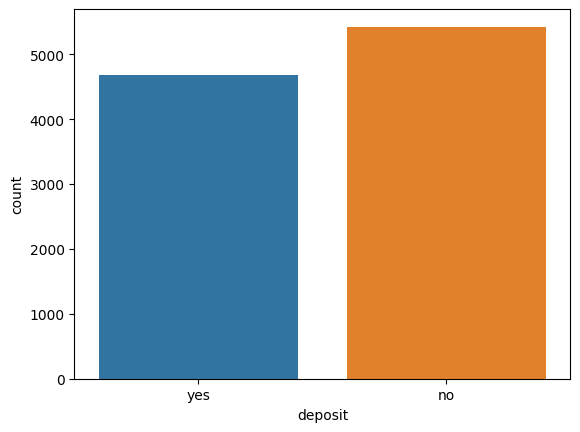

In [2398]:
# изучим соотношение классов в ваших данных на предмет несбалансированности
sns.countplot(x = 'deposit', data = df)

In [2399]:
df['deposit'].value_counts()

no     5424
yes    4681
Name: deposit, dtype: int64

В целом, можно говорить, что сбалансированноть групп присутствует

Рассмотрим описательные статистики для количественных переменных

In [2400]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


Рассмотрим описательные статистики для категориальных переменных

In [2401]:

df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


Из приведенное выше статистики можно извлечь следующую полезную информацию:

- среди клиентов банка представлено 11 сфер занятости
- маркетинговая кампания  проходила в каждый ли месяц
- чаще всего встречается семейное положение married 
- чаще всего встречается образование secondary 

Узнаем, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.

<AxesSubplot: xlabel='poutcome', ylabel='count'>

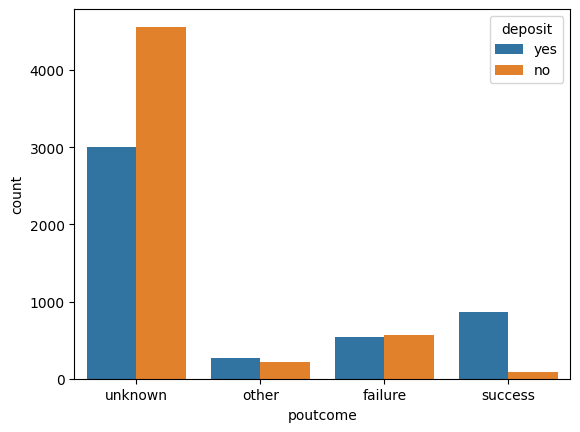

In [2402]:
#sns.countplot(x = 'poutcome', data = df, hue = 'deposit')

Теперь давайте узнаем, какова зависимость результата маркетинговых кампаний от месяца.

Временные периоды, сезоны, близость к каким-то праздникам часто влияют на решение клиентов использовать определённые услуги.

Рассчитаем, в каком месяце самый большой процент неудач при взаимодействии в текущей маркетинговой кампании. Возможно, этот месяц не является подходящим для проведения подобных акций, и это стоит отметить.

<AxesSubplot: xlabel='month', ylabel='count'>

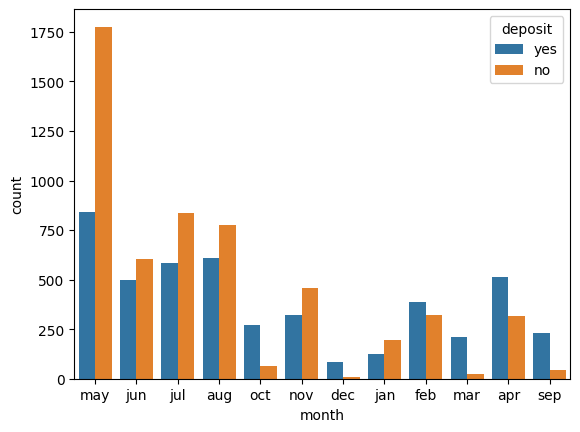

In [2403]:
sns.countplot(x = 'month', data = df, hue = 'deposit')

Нам бы очень хотелось посмотреть, люди какого возраста чаще открывают депозиты, а какого — реже. Однако, так как возрастной разброс достаточно большой, визуализация для всех возрастов или нахождение статистики для каждого возраста не будет содержательным. В аналитике принято разделять людей по возрастным подгруппам и делать выводы уже по ним.

Создадим новую переменную, в которой будет находиться индикатор принадлежности к одной из следующих категорий:

- '<30';
- '30-40';
- '40-50';
- '50-60';
- '60+'.

Для этого создадим функцию *get_age_category()*

In [2404]:
def get_age_category(arg):
    if arg < 30:
        age = '<30'
    elif arg >= 30 and arg < 40: 
        age  = '30-40'
    elif arg >= 40 and arg < 50: 
        age  = '40-50'
    elif arg >= 50 and arg <= 60: 
        age  = '50-60'
    else:
        age = '60+'
    return age

In [2405]:
df['age_group'] = df['age'].apply(get_age_category)
df = df.drop('age', axis = 1)

<AxesSubplot: xlabel='age_group', ylabel='count'>

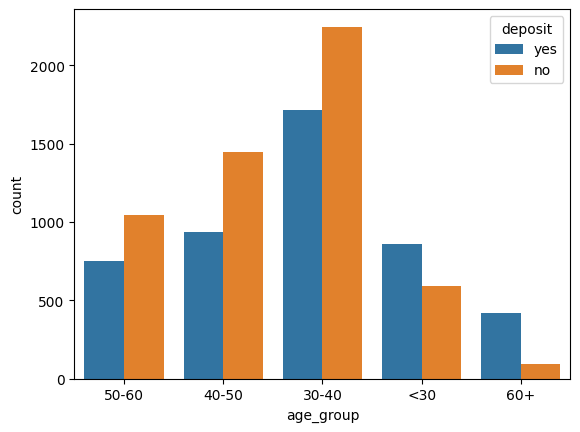

In [2406]:
sns.countplot(x = 'age_group', data = df, hue = 'deposit')

Из приведенной диаграммы можно видеть, что более склонны открывать депозит, чем отказываться от открытия депозита в банке после рекламного предложения возрастные группы 60+ и <30.

Посмотрим, как зависит соотношение успешных и неуспешных контактов с клиентами от категорий, к которым относятся клиенты:

- семейное положение;
- уровень образования;
- сфера занятости.

Построим визуализации, отражающие количество тех, кто открыл депозит, и тех, кто его не открыл, для всех категорий предложенных выше трёх признаков.

<AxesSubplot: xlabel='marital', ylabel='count'>

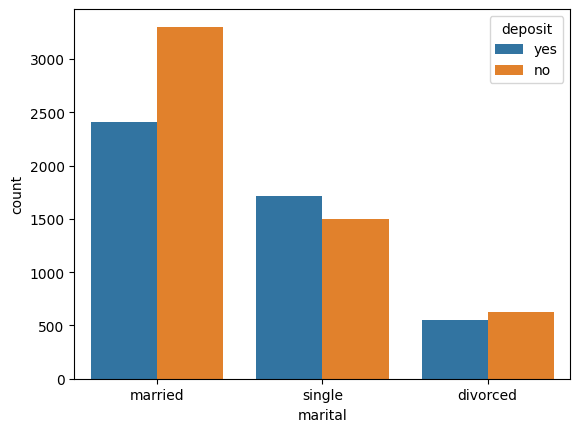

In [2407]:
sns.countplot(x = 'marital', data = df, hue = 'deposit')

<AxesSubplot: xlabel='education', ylabel='count'>

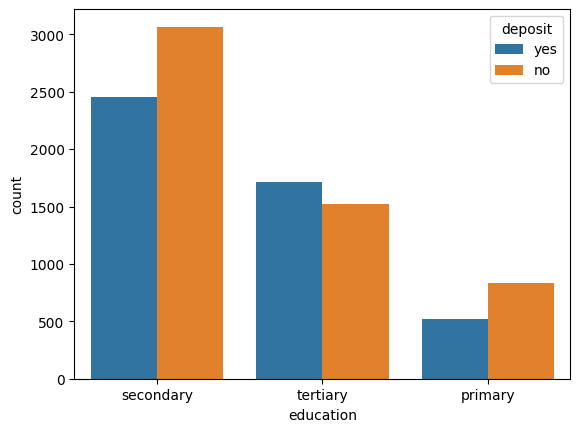

In [2408]:
# построим визуализации для открывших и неоткрывших депозит в зависимости от образования
sns.countplot(x = 'education', data = df, hue = 'deposit')

[Text(0, 0, 'admin.'),
 Text(1, 0, 'technician'),
 Text(2, 0, 'services'),
 Text(3, 0, 'management'),
 Text(4, 0, 'retired'),
 Text(5, 0, 'blue-collar'),
 Text(6, 0, 'unemployed'),
 Text(7, 0, 'entrepreneur'),
 Text(8, 0, 'housemaid'),
 Text(9, 0, 'self-employed'),
 Text(10, 0, 'student')]

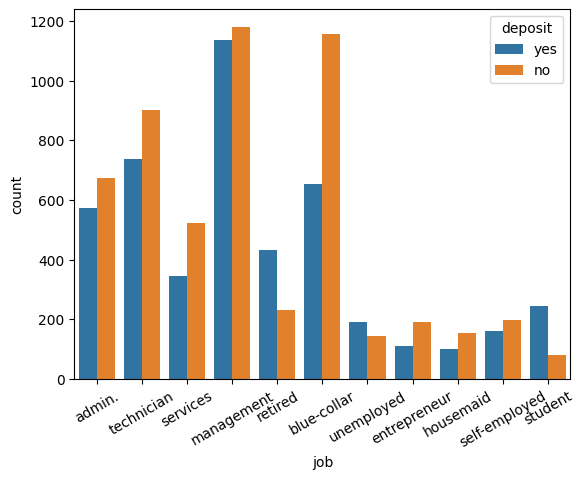

In [2409]:
# построим визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
pl = sns.countplot(x = 'job', data = df, hue = 'deposit')
pl.set_xticklabels(pl.get_xticklabels(),rotation = 30)

Построим сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны (если рассматривать тех, кто открыл депозит)

In [2410]:
pivot = pd.pivot_table(df, index=['marital', 'education'], columns = 'deposit', values = 'balance', aggfunc='count')
pivot

deposit               no   yes
marital  education            
divorced primary      91    96
         secondary   370   283
         tertiary    163   174
married  primary     641   339
         secondary  1830  1289
         tertiary    832   784
single   primary     100    82
         secondary   866   879
         tertiary    531   755

<AxesSubplot: xlabel='deposit', ylabel='marital-education'>

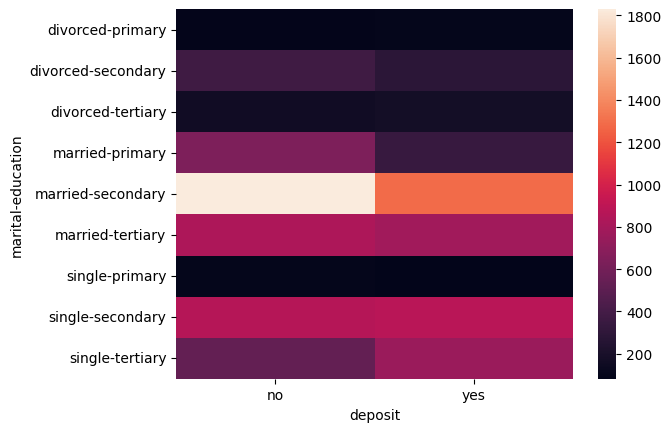

In [2411]:
sns.heatmap(pivot)

Из представленной тепловой карты можно сдделать вывод, что ересечение каких категорий married и secondary является самым многочисленным

## Часть 3: преобразование данных

Перед тем как перейти к построению модели, осталось сделать ещё один шаг.

- Следует помнить, что алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. По ходу работы алгоритм считает показатели (например, средние значения), которые можно вычислить только для количественных признаков. Поэтому нам необходимо преобразовать категориальные признаки в более удобный формат.
- Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить качество модели.
- Надо отобрать признаки, которые мы будем использовать для обучения модели.

Начнём с обработки категориального порядкового признака, который отвечает за уровень образования: education.

Обработаем его с помощью метода LabelEncoder, используя метод без дополнительных настроек.

Ранее мы создали порядковую переменную для возраста. Обработаем её по такому же принципу, чтобы её можно было использовать при обучении модели.

In [2412]:
LE = LabelEncoder()
df['education'] = LE.fit_transform(df['education'])
df['age_group'] = LE.fit_transform(df['age_group'])

Обычно в задачах бинарной классификации целевую переменную кодируют как бинарный признак, который принимает значения 1 или 0. Так как наш проект будет соответствовать всем правилам хорошего тона, давайте перекодируем переменную deposit таким образом, чтобы вместо yes она принимала значение 1, а вместо no — 0. Сделаем то же самое для других бинарных переменных, которых у нас три:

- 'default';
- 'housing';
- 'loan'.

Все три мы будем модифицировать ровно так же: для слова yes мы возьмём в качестве значения 1, а для no — 0

In [2415]:
# преобразуем бинарные переменные в представление из нулей и единиц
df['deposit'] = df['deposit'].apply(lambda x: 1 if x=='yes' else 0)
df['default'] = df['default'].apply(lambda x: 1 if x=='yes' else 0)
df['housing'] = df['housing'].apply(lambda x: 1 if x=='yes' else 0)
df['loan'] = df['loan'].apply(lambda x: 1 if x=='yes' else 0)
df.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,admin.,married,1,0,2343.0,1,0,unknown,5,may,1042,1,-1,0,unknown,1,2
1,admin.,married,1,0,45.0,0,0,unknown,5,may,1467,1,-1,0,unknown,1,2
2,technician,married,1,0,1270.0,1,0,unknown,5,may,1389,1,-1,0,unknown,1,1
3,services,married,1,0,2476.0,1,0,unknown,5,may,579,1,-1,0,unknown,1,2
4,admin.,married,2,0,184.0,0,0,unknown,5,may,673,2,-1,0,unknown,1,2


In [2416]:
df['deposit'].std()
round(df['default'].mean() + df['housing'].mean() + df['loan'].mean(), 3)

0.635

Теперь нам необходимо преобразовать номинальные переменные, которые могут принимать несколько различных значений. Это следующие переменные:

- 'job';
- 'marital';
- 'contact';
- 'month';
- 'poutcome'.

Создадим для них dummy-переменные и добавим их в набор данных.

In [2417]:
df = pd.get_dummies(df, columns=['job', 'marital', 'contact', 'month', 'poutcome'])

In [2418]:
df.shape

(10105, 45)

Теперь давайте оценим мультиколлинеарность и взаимосвязь признаков с целевой переменной.

Для этого построим матрицу корреляций. Дополним её тепловой картой, отражающей результат.

<AxesSubplot: >

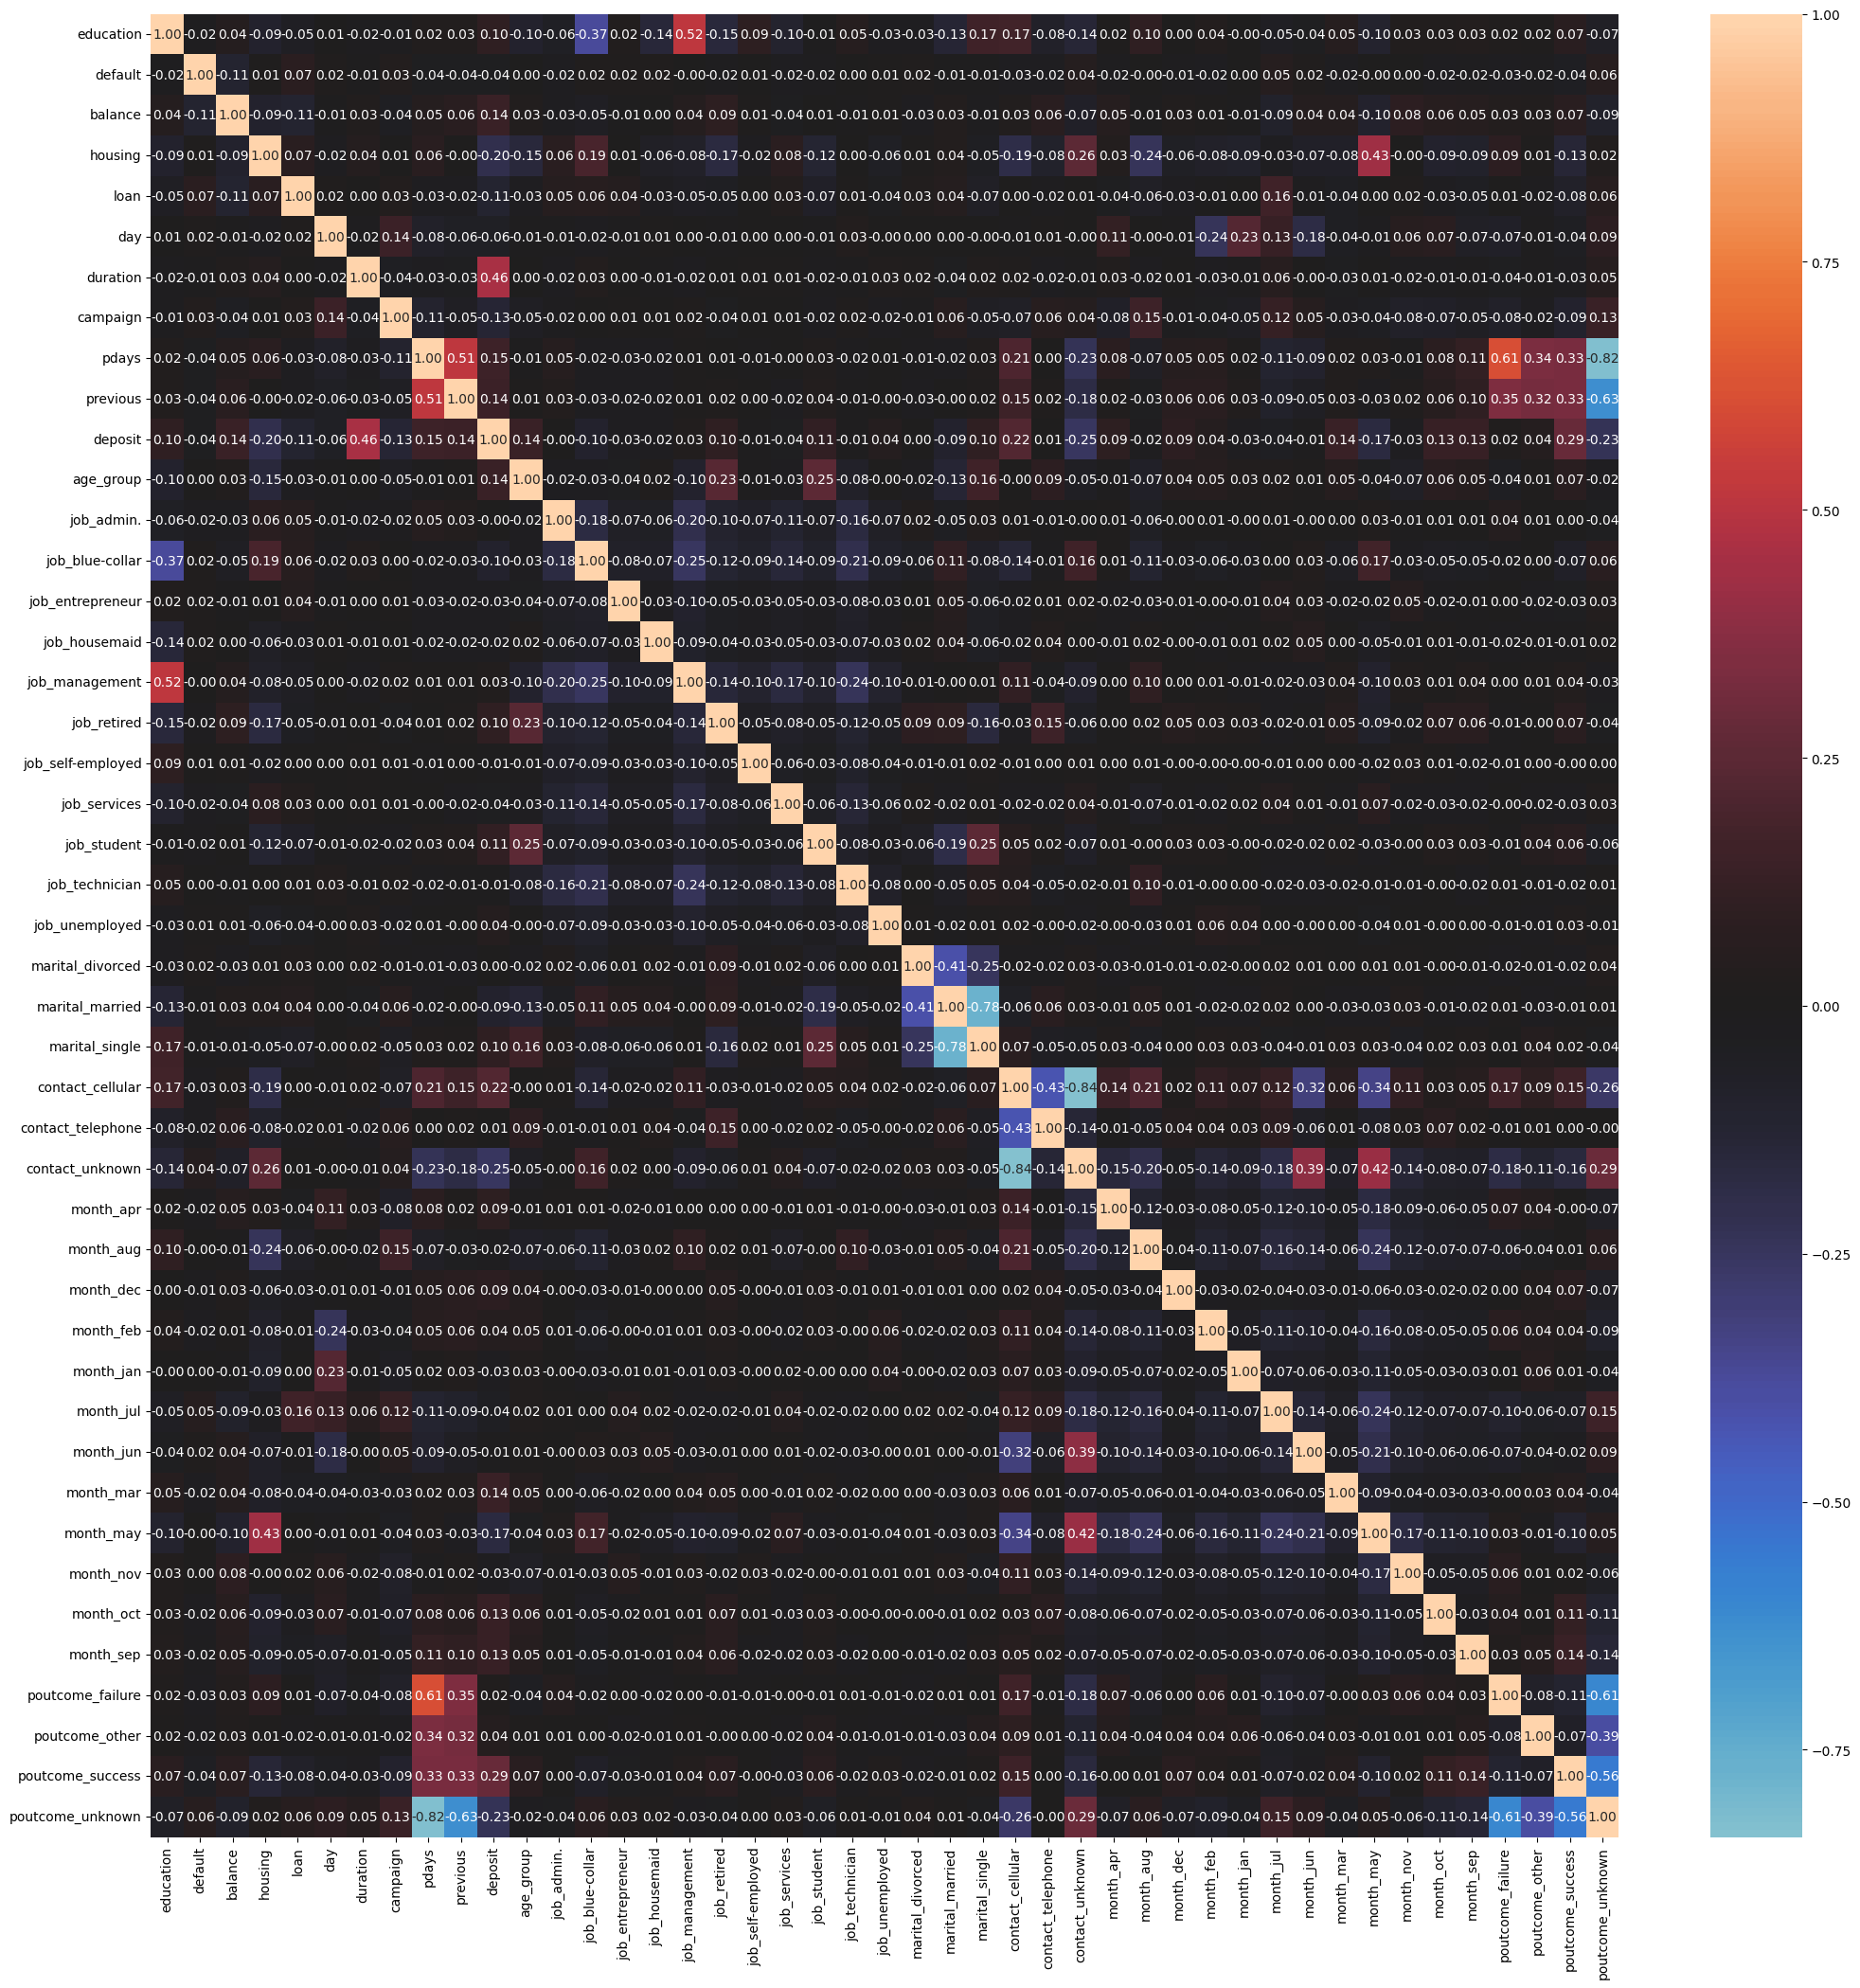

In [2419]:
# построим корреляционную матрицу и оценим данные на предмет наличия мультиколлинеарности
plt.figure(figsize=(25,25))  
sns.heatmap(df.corr(),fmt='.2f',annot=True, center=0)

Теперь вам необходимо определить целевую переменную и предикторы, а также разделить выборку на обучающую и тестовую.

In [2420]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
y.value_counts()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [2421]:
# рассчитайте необходимые показатели
print(f'Размер тестовой выбрки: {X_test.shape}')
print(f'Размер тренировочной выбрки: {X_train.shape}')
round(y_test.mean(), 2)

Размер тестовой выбрки: (3335, 44)
Размер тренировочной выбрки: (6770, 44)


0.46

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.

С помощью SelectKBest отберем 15 признаков, наилучшим образом подходящих для использования в задаче. Отбор реализуем по обучающей выборке, используя параметр score_func = f_classif.
На данном этапе вам необходимо оставить только те признаки, которые содержат лишь числовые значения.

In [2422]:
# с помощью SelectKBest отберем  15 наиболее подходящих признаков
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=15, score_func = f_classif)
selector.fit(X_train, y_train)
 
best_features = selector.get_feature_names_out()
best_features

array(['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous',
       'age_group', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [2423]:
X_train_kbest = X_train[best_features]
X_test_kbest = X_test[best_features]

Теперь данные необходимо нормализовать.

Есть разные варианты нормализации, но мы будем использовать min-max-нормализацию.

Нормализуем предикторы в обучающей и тестовой выборках.

In [2424]:
scaler = MinMaxScaler()
scaler.fit(X_test_kbest)

MinMaxScaler()

In [2425]:
# нормализуем данные с помощью minmaxsxaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train_kbest)
X_train_kbest_scaled = min_max_scaler.transform(X_train_kbest)
X_test_kbest_scaled = min_max_scaler.transform(X_test_kbest)
X_train_kbest_scaled = pd.DataFrame(X_train_kbest_scaled, columns=best_features)
X_test_kbest_scaled = pd.DataFrame(X_test_kbest_scaled, columns=best_features)

In [2426]:
X_test_kbest_scaled.describe()

,balance,housing,duration,campaign,pdays,previous,age_group,contact_cellular,contact_unknown,month_mar,month_may,month_oct,month_sep,poutcome_success,poutcome_unknown
count,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000
mean,0.468237,0.484858,0.093294,0.036153,0.062139,0.014501,0.333058,0.718741,0.209295,0.023688,0.251574,0.031484,0.029385,0.097451,0.743928
std,0.162158,0.499846,0.087248,0.063826,0.129784,0.039494,0.349444,0.449681,0.406867,0.152099,0.433983,0.174649,0.168909,0.296616,0.436527
min,0.017179,0.000000,0.000258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.352094,0.000000,0.034029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.408704,0.000000,0.063676,0.023810,0.000000,0.000000,0.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.535504,1.000000,0.127224,0.047619,0.033333,0.017241,0.500000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,0.999836,1.000000,0.797113,0.952381,0.969591,0.948276,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

Для начала реализуем самый простой алгоритм, который нам известен — логистическую регрессию. В качестве алгоритма оптимизации будем использовать 'sag', в качестве значения параметра random_state возьмём число 42 и запустим 1000 итераций.

Оценим качество модели на тестовой выборке.

In [2456]:
log_reg = linear_model.LogisticRegression(solver = 'sag', max_iter = 1000)
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_kbest_scaled, y_train)
y_test_pred = log_reg.predict(X_test_kbest_scaled)
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1790
           1       0.83      0.73      0.78      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.80      0.80      3335
weighted avg       0.81      0.81      0.80      3335



Простой алгоритм обучен. Теперь давайте обучим ещё один алгоритм — решающие деревья. В качестве параметров для начала возьмём следующие:

- criterion = 'entropy';
- random_state = 42.
- Остальные параметры оставьте по умолчанию.

In [2464]:
# обучим решающие деревья, настроим максимальную глубину
desision_tree = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=7)
desision_tree.fit(X_train_kbest_scaled, y_train)
y_train_pred = desision_tree.predict(X_train_kbest_scaled)
y_test_pred = desision_tree.predict(X_test_kbest_scaled)
print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3634
           1       0.82      0.84      0.83      3136

    accuracy                           0.84      6770
   macro avg       0.84      0.84      0.84      6770
weighted avg       0.84      0.84      0.84      6770

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1790
           1       0.80      0.82      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



Реализуем оптимизацию гиперпараметров с помощью GridSearch, перебрав следующие параметры:

- 'min_samples_split': [2, 5, 7, 10];
- 'max_depth':[3,5,7].

In [2429]:
# подберем оптимальные параметры с помощью gridsearch
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split': [2, 5, 7, 10] ,
              'max_depth':[3,5,7] 
              }
grid_search = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(
        random_state=42, #генератор случайных чисел
        criterion='entropy'
    ), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time 
grid_search.fit(X_train_kbest_scaled, y_train) 
y_test_pred = grid_search.predict(X_test_kbest_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

CPU times: user 4 µs, sys: 17 µs, total: 21 µs
Wall time: 8.11 µs
f1_score на тестовом наборе: 0.80
Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_split': 10}


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

Усложним обученные несложные модели и  посмотрим, улучшился ли результат (если да, то насколько). Мы обучили решающие деревья, и теперь пришла пора объединить их в случайный лес. Обучите случайный лес со следующими параметрами:

- n_estimators = 100;
- criterion = 'gini';
- min_samples_leaf = 5;
- max_depth = 10;
- random_state = 42.

Оценим метрики accuracy и recall для построенной модели на тестовой выборке.

In [2430]:
rf = ensemble.RandomForestClassifier(n_estimators = 100, 
                                     criterion = 'gini',
                                     min_samples_leaf = 5,
                                     max_depth = 10,
                                     random_state = 42
                                     )

#Обучаем модель
rf.fit(X_train_kbest_scaled, y_train)
#Выводим значения метрики 
y_train_pred = rf.predict(X_train_kbest_scaled)
print('Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = rf.predict(X_test_kbest_scaled)
print('Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print(metrics.classification_report(y_test, y_test_pred))

Train: 0.85
Test: 0.82
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



Теперь сравним полученные результаты с моделью градиентного бустинга. Используем градиентный бустинг для решения задачи классификации, задав для него следующие параметры:

- learning_rate = 0.05;
- n_estimators = 300;
- min_samples_leaf = 5;
- max_depth = 5;
- random_state = 42.

In [2431]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Создаем модель градиентного бустинга
gb = GradientBoostingClassifier(
    learning_rate=0.05, #темп обучения
    n_estimators = 300, #число деревьев
    min_samples_leaf = 5,
    max_depth=5, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
# Обучаем модель
gb.fit(X_train_kbest_scaled, y_train)
# Формируем предсказание для тестовой выборки
y_pred_gb = gb.predict(X_test_kbest_scaled)
# Посмотрим на основные метрики классификации
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



Итак, модель случайный лес показала лучший результат по сравнению с моделью градиентного бустинга.

Построим ансамбль из моделей разного типа.

Используем стекинг, объединив те алгоритмы, которые мы уже использовали ранее: решающие деревья, логистическую регрессию и градиентный бустинг. В качестве метамодели используем модель логистической регрессии.

Параметры оставим те же, что были в наших алгоритмах в предыдущих заданиях.

In [2447]:
# объединим уже известные вам алгоритмы с помощью стекинга 
from sklearn.ensemble import StackingClassifier

In [2449]:
# Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('dt',  desision_tree),
    ('lr', log_reg),
    ('gb', gb) 
]

# Создаем объект класса стекинг
reg = StackingClassifier(
    estimators=estimators,
    final_estimator=log_reg
)
# Обучаем модель
reg.fit(X_train_kbest_scaled, y_train)

StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=7,
                                                       random_state=42)),
                               ('lr',
                                LogisticRegression(max_iter=1000,
                                                   solver='sag')),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           max_depth=5,
                                                           min_samples_leaf=5,
                                                           n_estimators=300,
                                                           random_state=42))],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      solver='sag'))

In [2452]:
# Формируем предсказание для тестовой выборки
y_pred_stack = reg.predict(X_test_kbest_scaled)
# Оцениваем качество по метрике MSE
print(classification_report(y_test, y_pred_stack))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1790
           1       0.81      0.81      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



Разумеется, не все признаки одинаково хорошо предсказывают результат маркетинговой кампании. Для того чтобы отобрать наиболее значимые для нас аспекты, на которые надо будет обратить внимание при реализации следующей акции, давайте выберем три признака, дающих наибольший вклад.

In [2438]:
# оценим, какие признаки демонстрируют наибольшую  важность 
from sklearn.feature_selection import RFE
estimator = gb
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_kbest_scaled, y_train)
 
selector.get_feature_names_out()

array(['balance', 'duration', 'poutcome_success'], dtype=object)

Применим Optuna для оптимизации гиперпараметров. Для перебора возьмием случайный лес и следующие параметры:

- n_estimators = trial.suggest_int('n_estimators', 100, 200, 1);
- max_depth = trial.suggest_int('max_depth', 10, 30, 1);
- min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1).

In [2439]:
# реализуем оптимизацию гиперпараметров с помощью Optuna
import optuna
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  # обучаем модель
  model.fit(X_train_kbest_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_kbest_scaled))

  return score

In [2440]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2023-07-24 10:24:29,802] A new study created in memory with name: RandomForestClassifier
[I 2023-07-24 10:24:30,395] Trial 0 finished with value: 0.8630887185104053 and parameters: {'n_estimators': 161, 'max_depth': 16, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.8630887185104053.
[I 2023-07-24 10:24:30,837] Trial 1 finished with value: 0.8548236028723072 and parameters: {'n_estimators': 141, 'max_depth': 28, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.8630887185104053.
[I 2023-07-24 10:24:31,309] Trial 2 finished with value: 0.8498982626389106 and parameters: {'n_estimators': 155, 'max_depth': 29, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.8630887185104053.
[I 2023-07-24 10:24:31,946] Trial 3 finished with value: 0.866885656186454 and parameters: {'n_estimators': 191, 'max_depth': 17, 'min_samples_leaf': 5}. Best is trial 3 with value: 0.866885656186454.
[I 2023-07-24 10:24:32,303] Trial 4 finished with value: 0.8773790951638065 and parameters: {'n_es

CPU times: user 11.2 s, sys: 89.2 ms, total: 11.3 s
Wall time: 11.3 s


In [2441]:
study.best_params

{'n_estimators': 193, 'max_depth': 24, 'min_samples_leaf': 2}

In [2442]:
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 193, 'max_depth': 24, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.92


In [2443]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42)
model.fit(X_train_kbest_scaled, y_train)
y_train_pred = model.predict(X_train_kbest_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test_kbest_scaled, y_test)))
y_test_pred = model.predict(X_test_kbest_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.82
f1_score на тестовом наборе: 0.81


In [2444]:
model = ensemble.RandomForestClassifier(n_estimators=193, max_depth=24, min_samples_leaf=2,random_state=42)
model.fit(X_train_kbest_scaled, y_train)
y_train_pred = model.predict(X_train_kbest_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test_kbest_scaled, y_test)))
y_test_pred = model.predict(X_test_kbest_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.82
f1_score на тестовом наборе: 0.81


Таким образом, нам удалось улучшить результат построенной модели